$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°5 | Visualización, pre-procesamiento de datos, creación de modelo 
y métricas de evaluación - Móleculas activas contra SARS-COV-2}$$


_Integrantes:_

* _Giovanni Taco_

* _Francisco Ruiz_

### Carga de librerias

In [48]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tarfile
#import urlib

#Librerias para clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

### Importación del dataset

In [49]:
# Se realiza la importación del dataset
df = pd.read_csv("Challenge5.csv")
df.head()

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66


In [50]:
df.shape

(300, 39)

In [67]:
# Se verifican las features que tienen algun valor nulo con el fin de tratarlos
df.isnull().any()

Molecular_weight                 False
LogP                             False
Number_of_HBA_1                  False
Number_of_HBA_2                  False
Number_of_HBD_1                  False
Number_of_HBD_2                  False
Number_of_acidic_groups          False
Number_of_aliphatic_OH_groups    False
Number_of_basic_groups           False
Fraction_of_rotatable_bonds      False
Number_of_heavy_bonds            False
Number_of_heterocycles           False
Number_of_hydrophobic_groups     False
MolarRefractivity                False
Number_of_atoms                  False
Number_of_halogen_atoms          False
Number_of_B_atoms                False
Number_of_Br_atoms               False
Number_of_Cl_atoms               False
Number_of_I_atoms                False
Number_of_F_atoms                False
Number_of_N_atoms                False
Number_of_O_atoms                False
Number_of_P_atoms                False
Number_of_S_atoms                False
Number_of_bonds          

In [69]:
#Se verifica la existencia de un valor nulo
df.isnull().any().sum()

1

In [83]:
#Se reemplazan los datos nulos con la media de la columna en cuestión
promedio =df["Geometrical_shape_coefficient"].mean()
df["Geometrical_shape_coefficient"].fillna(promedio, inplace=True)

In [84]:
df.isnull().any().sum()
#Se visualizan que los datos nulos fueron tratado adecuadamente

0

In [52]:

# se procede a verificar la cantidad de elementos únicos 
# que tiene cada feature

for col in df.columns:
    print(f'Columna {col}: {df[col].nunique()}')

Columna cid: 300
Columna Molecular_weight: 152
Columna LogP: 200
Columna Number_of_HBA_1: 44
Columna Number_of_HBA_2: 8
Columna Number_of_HBD_1: 5
Columna Number_of_HBD_2: 6
Columna Number_of_acidic_groups: 3
Columna Number_of_aliphatic_OH_groups: 5
Columna Number_of_basic_groups: 3
Columna Fraction_of_rotatable_bonds: 82
Columna Number_of_heavy_bonds: 38
Columna Number_of_heterocycles: 3
Columna Number_of_hydrophobic_groups: 1
Columna MolarRefractivity: 200
Columna Number_of_atoms: 60
Columna Number_of_halogen_atoms: 4
Columna Number_of_B_atoms: 1
Columna Number_of_Br_atoms: 2
Columna Number_of_Cl_atoms: 3
Columna Number_of_I_atoms: 2
Columna Number_of_F_atoms: 4
Columna Number_of_N_atoms: 6
Columna Number_of_O_atoms: 9
Columna Number_of_P_atoms: 2
Columna Number_of_S_atoms: 3
Columna Number_of_bonds: 58
Columna Number_of_NO2_groups: 2
Columna Number_of_SO_groups: 1
Columna Number_of_OSO_groups: 1
Columna Number_of_SO2_groups: 2
Columna PolarSurfaceArea: 74
Columna Geometrical_diamete

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [54]:
df.duplicated().sum()

0

In [55]:
df = df.drop(['cid'], axis=1)

In [56]:
#Se hace una descripción estadística de los datos
df.describe()

,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,Fraction_of_rotatable_bonds,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.0,300.000000,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,334.807295,7.927830,30.133333,4.460000,1.433333,1.493333,0.323333,0.553333,0.043333,0.183552,...,0.0,0.013333,75.364767,11.474213,0.945957,12.222353,19.532942,8.188036,268.383333,291.973333
std,142.954809,6.127177,18.272800,1.224772,0.864898,1.169551,0.522525,0.925569,0.285881,0.134907,...,0.0,0.163026,22.637438,3.635444,0.169270,8.281095,8.096676,3.568366,176.785634,207.521283
min,122.115432,-1.765100,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,26.300000,6.792787,0.000000,5.665398,7.111111,3.164062,59.000000,62.000000
25%,185.874997,2.399200,13.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.051282,...,0.0,0.000000,60.360000,8.287358,0.967964,7.686705,11.076923,5.612245,95.000000,90.750000
50%,352.385992,6.627100,27.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.181818,...,0.0,0.000000,69.495000,11.217634,0.970923,10.949384,22.166238,7.527734,230.000000,233.000000
75%,456.710990,13.571075,48.000000,5.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.285714,...,0.0,0.000000,85.400000,13.765704,1.007529,13.675099,25.641274,10.681295,462.000000,534.000000
max,917.629981,40.375700,118.000000,9.000000,4.000000,5.000000,2.000000,4.000000,2.000000,0.576923,...,0.0,2.000000,161.800000,38.162784,1.085336,89.461191,56.908163,28.296312,1008.000000,1066.000000


#### Preprocesamiento de los datos

In [159]:
#Creacion de un pipeline o flujo de trabajo para 
# optimizacion de codigo
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca",PCA(n_components=15, random_state=42))
    ]
)

preprocessor.fit(df.values)
df_norm = pd.DataFrame(preprocessor.transform(df.values))
df_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.935323,-0.061660,-0.237416,-0.172443,-0.020153,0.086488,-0.083337,0.068346,-0.038628,0.058955,-0.021697,0.000429,-0.013713,-0.008592,0.012009
1,-0.910761,-0.378234,0.022728,0.227446,0.475203,0.494966,-0.097932,0.150093,-0.289386,-0.571654,0.081229,-0.196590,-0.145046,-0.086284,-0.109741
2,-0.766695,-0.210814,-0.520537,0.379390,0.105476,-0.620433,-0.297368,-0.334856,0.094105,0.178551,0.973082,-0.048320,0.026802,-0.040124,-0.135811
3,-0.890954,0.004860,-0.324217,-0.158131,-0.082073,0.093245,-0.093152,0.052946,-0.041652,0.038407,-0.018120,-0.019324,0.024550,-0.012520,0.025509
4,-0.955755,-0.105143,-0.287371,0.128692,-0.025835,-0.141415,0.023527,0.055748,-0.097731,0.023536,-0.154926,0.011163,-0.101083,0.301552,0.214541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.088426,0.535463,0.406217,-0.091405,0.254755,-0.106316,0.028910,0.169824,-0.041696,0.087462,-0.001668,0.013605,-0.177113,0.142592,-0.099509
296,0.106212,-0.032565,0.503971,-0.033344,-0.032735,-0.072483,-0.034977,0.167905,-0.059869,0.047444,0.006212,-0.023473,0.001920,-0.066161,0.037073
297,0.199367,0.353774,0.520980,0.041042,0.163922,-0.062104,0.013105,0.081765,0.006553,0.080973,0.005301,-0.009048,-0.080247,0.030580,-0.044141
298,0.411816,-0.073479,0.717293,-0.176031,0.507043,-0.334655,0.008819,-0.031635,0.064859,0.069805,-0.021122,-0.035698,-0.121890,0.033653,-0.072573


In [160]:

kmeans = KMeans(n_clusters=3, max_iter= 500, random_state=42)
kmeans.fit(df_norm.values)
df_norm["cluster"] = kmeans.labels_
df_norm


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster
0,-0.935323,-0.061660,-0.237416,-0.172443,-0.020153,0.086488,-0.083337,0.068346,-0.038628,0.058955,-0.021697,0.000429,-0.013713,-0.008592,0.012009,2
1,-0.910761,-0.378234,0.022728,0.227446,0.475203,0.494966,-0.097932,0.150093,-0.289386,-0.571654,0.081229,-0.196590,-0.145046,-0.086284,-0.109741,2
2,-0.766695,-0.210814,-0.520537,0.379390,0.105476,-0.620433,-0.297368,-0.334856,0.094105,0.178551,0.973082,-0.048320,0.026802,-0.040124,-0.135811,2
3,-0.890954,0.004860,-0.324217,-0.158131,-0.082073,0.093245,-0.093152,0.052946,-0.041652,0.038407,-0.018120,-0.019324,0.024550,-0.012520,0.025509,2
4,-0.955755,-0.105143,-0.287371,0.128692,-0.025835,-0.141415,0.023527,0.055748,-0.097731,0.023536,-0.154926,0.011163,-0.101083,0.301552,0.214541,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.088426,0.535463,0.406217,-0.091405,0.254755,-0.106316,0.028910,0.169824,-0.041696,0.087462,-0.001668,0.013605,-0.177113,0.142592,-0.099509,1
296,0.106212,-0.032565,0.503971,-0.033344,-0.032735,-0.072483,-0.034977,0.167905,-0.059869,0.047444,0.006212,-0.023473,0.001920,-0.066161,0.037073,1
297,0.199367,0.353774,0.520980,0.041042,0.163922,-0.062104,0.013105,0.081765,0.006553,0.080973,0.005301,-0.009048,-0.080247,0.030580,-0.044141,1
298,0.411816,-0.073479,0.717293,-0.176031,0.507043,-0.334655,0.008819,-0.031635,0.064859,0.069805,-0.021122,-0.035698,-0.121890,0.033653,-0.072573,1


In [161]:
print(kmeans.cluster_centers_)

[[ 7.96412037e-01 -6.58924168e-02 -2.62275207e-01 -2.50401249e-04
   6.31270458e-03  1.72450670e-02 -6.74448224e-04  6.23470594e-03
  -5.79469907e-03 -2.32989042e-04 -3.02273916e-03  4.34169824e-03
   1.15765054e-03  1.19893899e-03 -2.71872102e-03]
 [ 4.48203901e-02  1.84311734e-01  3.93452291e-01 -2.53382371e-02
  -6.50920138e-02 -5.76372098e-02 -2.33911792e-02  1.43829732e-02
  -1.13308157e-02 -1.98617511e-02  4.59253425e-03 -2.31945801e-03
  -5.64269506e-04 -4.13395384e-03 -2.20578999e-03]
 [-8.41232427e-01 -1.18419318e-01 -1.31177084e-01  2.55886383e-02
   5.87793093e-02  4.03921428e-02  2.40656275e-02 -2.06176791e-02
   1.71255148e-02  2.00947401e-02 -1.56979509e-03 -2.02224023e-03
  -5.93381029e-04  2.93501485e-03  4.92451101e-03]]


### Visualización

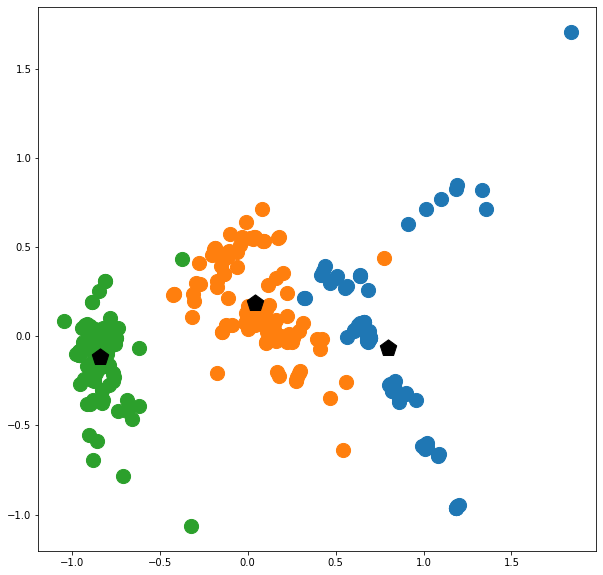

In [162]:
plt.figure(figsize=(10,10))

for cluster in range(kmeans.n_clusters):
    plt.scatter(df_norm[df_norm["cluster"] == cluster][0],
                df_norm[df_norm["cluster"] == cluster][1],
                marker="o", s=200, cmap="set3")
    
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="p", s=300, color = "black")

plt.grid()

In [165]:
preproceddes_data = df.values
predicted_data= kmeans.labels_

silhouette_score (preproceddes_data,predicted_data)

0.6946420671894463

### Análisis

AFSFfS